# <font color='Blue'> Task : Stock Market prediction Using Textual and Numerical Analysis.</font>

A stock is the small chunk of ownership in the company. The stock price of the company reflects the net evaluation of the company and also gives a little insight into its performance. These stocks are traded on exchanges and their prices are constantly changing due to their demand and supply in the market. If a stock is in high demand and low in supply i.e. more people want to buy it and fewer people are willing to sell it then the price for the stock will go up and similarly if the stock is in low demand and high on supply which means people more people are ready to sell it but fewer people are willing to buy it then its prices go down.

The sudden increase in the demand for the stock can be due to various reasons including positive news about the company or an announcement from the company.


## <font color='green'>Content</Font>

1) Important Libraries

2) Importing Data

3) Numerical Analysis

4) Cleaning Text Data and extracting important information (Sentiment analysis).

5) Preparing Data.

6) Spliting Data.

7) Training Model.

8) Evaluating Model.

# Imp. Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk

# Importing Data

In [2]:
df1=pd.read_csv(r'india-news-headlines.csv')
df1.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [3]:
import pandas_datareader as web
df2=web.DataReader('^BSESN', data_source='yahoo', start='2015-01-01', end='2020-12-31')
df2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312
2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938
2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312
2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938


In [4]:
print(df1.info())
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1474 entries, 2015-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1474 non-null   float64
 1   Low        1474 non-null   float64
 2   Open       1474 non-null   float64
 3   Close      1474 non-null   float64
 4   Volume     1474 non-null   float64
 5   Adj Close  1474 non-null   float64
dtypes: float64(6)
memory usage: 80.6 KB
None


# Visualization and Analysis on numerical Data.

In [5]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

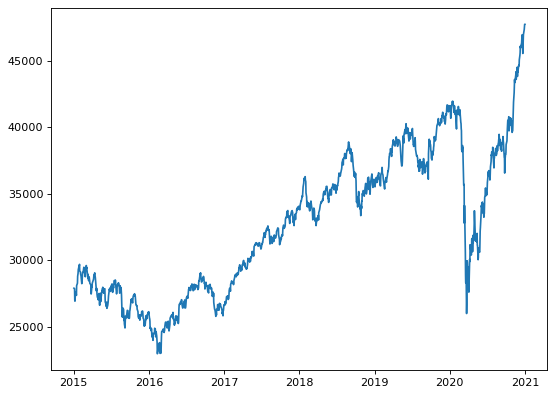

In [6]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
# close Stock price
plt.plot(df2['Close'])

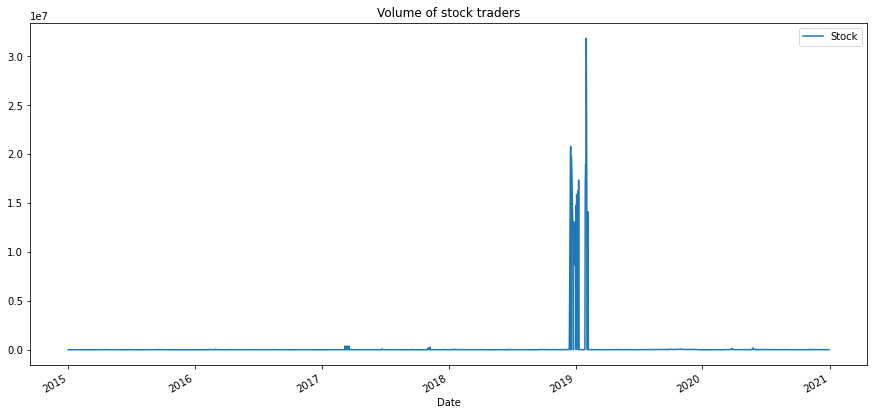

In [7]:
# Volume
df2['Volume'].plot(label = 'Stock', figsize = (15,7))
plt.title('Volume of stock traders')
plt.legend()

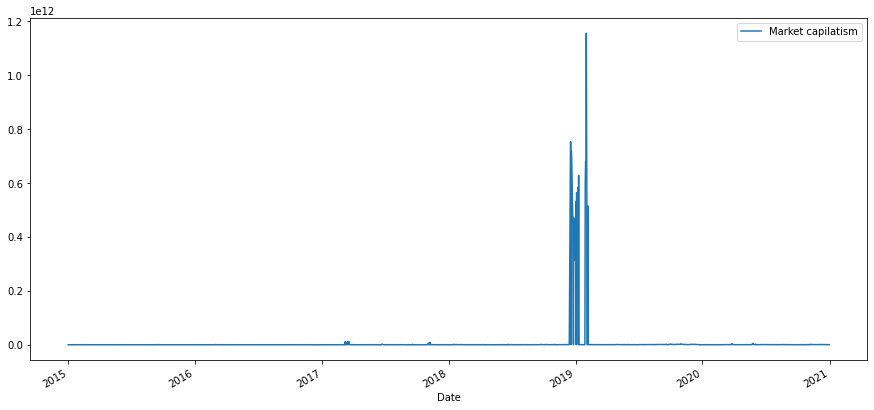

In [8]:
#Market Capitalism
df2['Market Capitalism']=df2['Open']*df2['Volume']
df2['Market Capitalism'].plot(label='Market capilatism', figsize=(15,7))
plt.legend()

<AxesSubplot:xlabel='Date'>

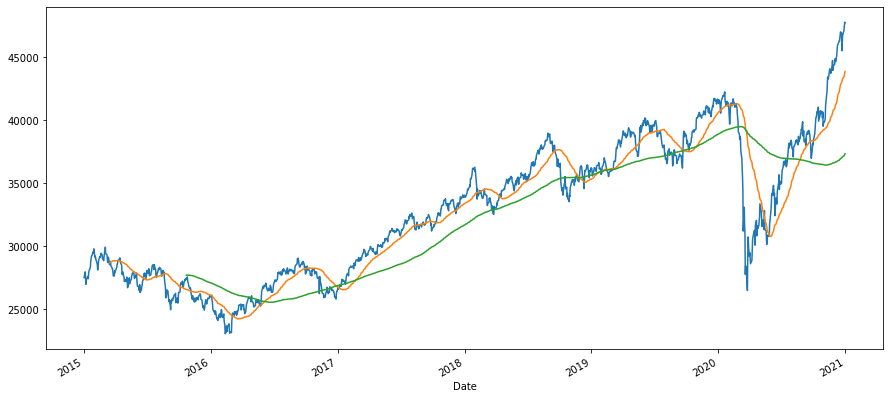

In [9]:
#As we know the stock prices are highly volatile and prices change quickly with time. 
# To observe any trend or pattern we can take the help of a 50-day 200-day average
df2['MA50'] = df2['Open'].rolling(50).mean()
df2['MA200'] = df2['Open'].rolling(200).mean()
df2['Open'].plot(figsize = (15,7))
df2['MA50'].plot()
df2['MA200'].plot()


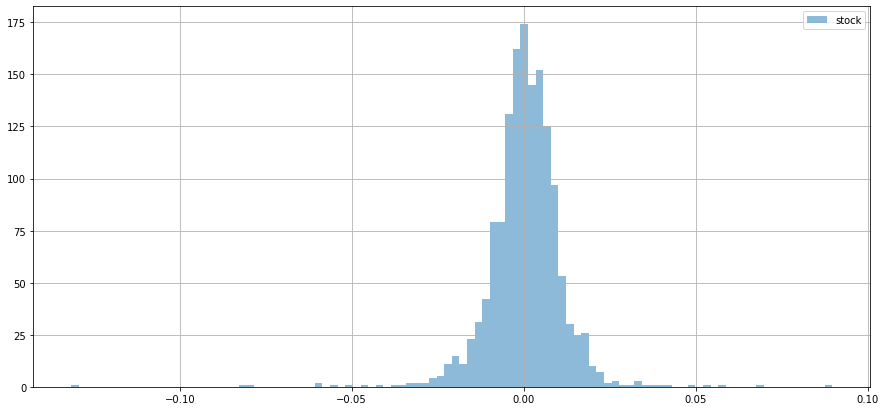

In [10]:
# returns
df2['returns'] = (df2['Close']/df2['Close'].shift(1)) -1
df2['returns'].hist(bins = 100, label = 'stock', alpha = 0.5, figsize = (15,7))
plt.legend()

<AxesSubplot:xlabel='Date'>

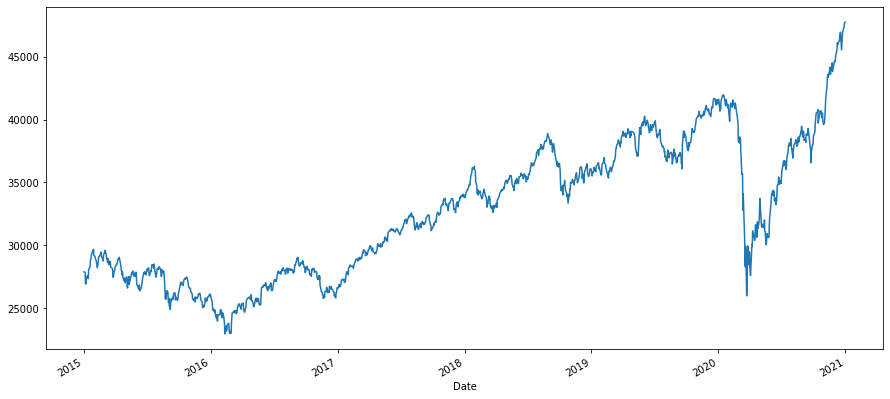

In [11]:
# adj. Close
df2['Adj Close'].plot(label = 'Adj lose', figsize = (15,7))

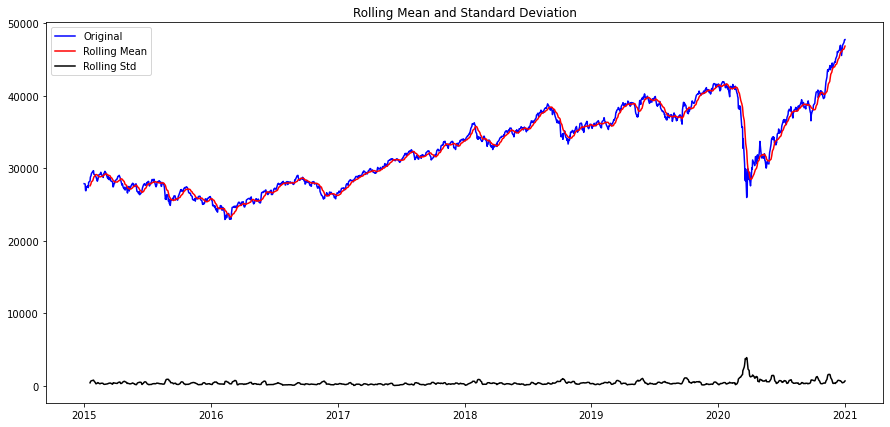

Results of dickey fuller test
Test Statistics                  -0.380649
p-value                           0.913280
No. of lags used                 12.000000
Number of observations used    1461.000000
critical value (1%)              -3.434834
critical value (5%)              -2.863520
critical value (10%)             -2.567824
dtype: float64


In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(15,7))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df2.Close)

#### Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

#### We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

 

<ipython-input-13-329c9e6d0425>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df2.Close, model='multiplicative', freq = 30)


<Figure size 432x288 with 0 Axes>

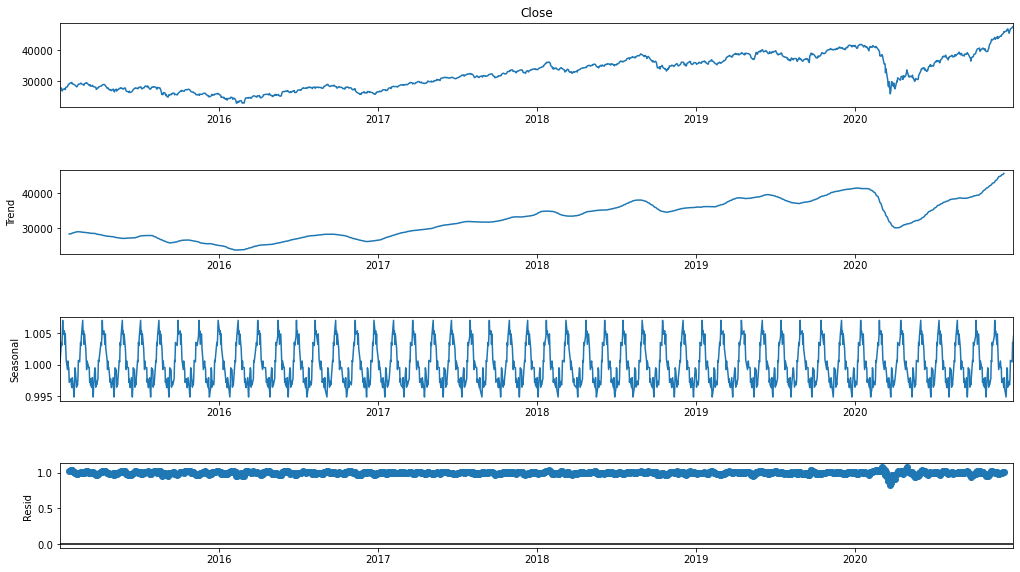

In [13]:
# looking fOR ANY trend or Seasonal Variations.
result = seasonal_decompose(df2.Close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)


#  Cleaning Text Data and extracting important information (Sentiment analysis).

In [14]:
df1['publish_date'] = pd.to_datetime(df1['publish_date'], format = '%Y%m%d')

In [15]:
df1['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'elections.assembly-elections.bihar',
       'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
      dtype=object)

In [16]:
df1['headline_category'].value_counts()

india                                            288541
unknown                                          209582
city.mumbai                                      134428
city.delhi                                       127717
business.india-business                          116761
                                                  ...  
2013-the-year-sachin-bids-adieu.football-2013         8
pms-us-visit                                          8
sports.hockey.hockey-india-league.interviews          8
indias-vision                                         8
business.faqs.gst-faqs                                8
Name: headline_category, Length: 1013, dtype: int64

In [17]:
df1['publish_date'].value_counts()

2014-10-10    706
2014-12-21    706
2014-12-15    706
2014-10-11    705
2014-11-09    705
             ... 
2001-03-16      1
2001-03-17      1
2001-06-04      1
2001-04-01      1
2001-03-09      1
Name: publish_date, Length: 7262, dtype: int64

In [18]:
df1['headline_text'].value_counts()

Straight Answers                                                     6723
Cartoons                                                             1536
Straight answers                                                     1500
Photogallery                                                         1353
Your say                                                             1012
                                                                     ... 
Centre's pollution plan calls for stricter parking norms                1
Lawyer Satish Sonak dies in court; funeral today                        1
Despite glitches; joyriders flock to underground metro line             1
70% of those involved in snatching this year first-timers: UT SSP       1
72% Covid-19 patients recover in Bihar                                  1
Name: headline_text, Length: 3168800, dtype: int64

In [19]:
df1.isna().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [20]:
df1['headline_text'].value_counts().count()

3168800

In [21]:
df1.duplicated().sum()

24191

In [22]:
df1.duplicated(keep=False).sum()

46130

In [23]:
cols = list(df1.columns)

In [24]:
df1.sort_values(by=cols, inplace=True, ignore_index=True)

In [25]:
df1[df1.duplicated(keep=False)]

,publish_date,headline_category,headline_text
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
9,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3421893,2020-12-27,city.nagpur,Govt forcing helpless sr citizens to fight leg...
3422119,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422120,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422956,2020-12-29,city.pune,PMC to draft separate DP after 23 villages' me...


In [26]:
df1.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [27]:
df1.duplicated().sum()

0

In [28]:
from textblob import TextBlob

In [29]:
lst = df1['publish_date'].value_counts().index.tolist()

In [30]:
new = []
for x in lst:
    df = df1.loc[df1['publish_date'] == x]
    headlinetext = ''
    publishdate = str(x)
    headlinetext = df['headline_text'].iloc[0]
    for i in range(1 , len(df)):
        headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
    new.append(headlinetext)


In [31]:
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})

In [32]:
newsdf.head()

,publish_date,headline_text
0,2014-12-15,Golden Homes III. Golden Panorama. Hanging Gar...
1,2014-12-21,Eight companies add Rs 55;171 crore in m-cap; ...
2,2014-12-09,Audi-Vredestein driving experience. Benelli TN...
3,2014-11-29,6 CARE IPO merchant bankers fined Rs 1 crore. ...
4,2014-11-01,Chetan Bhagat: Cleanliness begins at home. Gau...


In [33]:
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)

In [34]:
newsdf.head()

,publish_date,headline_text
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...
4,2001-01-06,Anti-immigration think-tank berates Clinton re...


In [35]:
newsdf.tail()

,publish_date,headline_text
7257,2020-12-27,Horoscope Today; 27 December 2020: Check astro...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Horoscope Today; 29 December 2020: Check astro...
7260,2020-12-30,Horoscope Today; 30 December 2020: Check astro...
7261,2020-12-31,Horoscope Today; 31 December 2020: Check astro...


In [36]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
    polarity.append(TextBlob(row['headline_text']).sentiment[0])
    subjectivity.append(TextBlob(row['headline_text']).sentiment[1])


In [37]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity

In [38]:
newsdf.head()

,publish_date,headline_text,polarity,subjectivity
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542
4,2001-01-06,Anti-immigration think-tank berates Clinton re...,0.219481,0.464935


In [39]:
newsdf.rename(columns={'publish_date': 'Date'}, inplace = True)

In [40]:
newsdf = newsdf.filter(['Date', 'polarity', 'subjectivity'], axis=1)

In [41]:
newsdf.shape

(7262, 3)

In [42]:
newsdf['Date'].duplicated().sum()

0

In [43]:
df2.shape

(1474, 10)

In [44]:
newsdf.head()

,Date,polarity,subjectivity
0,2001-01-02,0.193519,0.293056
1,2001-01-03,0.088462,0.407692
2,2001-01-04,0.091426,0.481895
3,2001-01-05,0.257415,0.465542
4,2001-01-06,0.219481,0.464935


In [45]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          7262 non-null   datetime64[ns]
 1   polarity      7262 non-null   float64       
 2   subjectivity  7262 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 170.3 KB


# Preparing Data

In [46]:
df2.reset_index(inplace=True)

In [47]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [48]:
df2 = pd.merge(df2, newsdf)

In [49]:
df2.shape

(1474, 13)

In [50]:
df2.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Market Capitalism,MA50,MA200,returns,polarity,subjectivity
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391,2.036575e+08,NaN,NaN,NaN,0.055586,0.455251
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312,2.574016e+08,NaN,NaN,-0.001634,0.100081,0.433132
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938,3.904886e+08,NaN,NaN,-0.030704,0.055802,0.386579
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312,3.291978e+08,NaN,NaN,-0.002914,0.034707,0.386916
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938,2.228659e+08,NaN,NaN,0.013597,0.060173,0.408416


In [51]:
df2.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Market Capitalism,MA50,MA200,returns,polarity,subjectivity
1469,2020-12-24,47053.398438,46539.019531,46743.488281,46973.539062,13700.0,46973.539062,6.403858e+08,43317.963359,37125.668574,0.011398,0.047936,0.390942
1470,2020-12-28,47406.718750,47148.238281,47153.589844,47353.750000,9600.0,47353.750000,4.526745e+08,43448.571328,37173.366719,0.008094,0.070784,0.414510
1471,2020-12-29,47714.550781,47361.898438,47466.621094,47613.078125,12800.0,47613.078125,6.075728e+08,43576.942734,37225.948828,0.005476,0.061175,0.424021
1472,2020-12-30,47807.851562,47358.359375,47789.031250,47746.218750,15600.0,47746.218750,7.455089e+08,43733.991172,37287.549492,0.002796,0.043919,0.441660
1473,2020-12-31,47896.968750,47602.121094,47753.109375,47751.328125,13900.0,47751.328125,6.637682e+08,43882.681953,37353.952539,0.000107,0.092529,0.406220


In [52]:
df2['MA50']=df2['MA50'].fillna(df2['MA50'].mean())

In [53]:
df2['MA200']=df2['MA200'].fillna(df2['MA200'].mean())

In [54]:
df2['returns']=df2['returns'].fillna(df2['returns'].mean())

In [55]:
df2.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Market Capitalism,MA50,MA200,returns,polarity,subjectivity
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391,2.036575e+08,32625.380641,32549.164463,0.000430,0.055586,0.455251
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312,2.574016e+08,32625.380641,32549.164463,-0.001634,0.100081,0.433132
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938,3.904886e+08,32625.380641,32549.164463,-0.030704,0.055802,0.386579
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312,3.291978e+08,32625.380641,32549.164463,-0.002914,0.034707,0.386916
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938,2.228659e+08,32625.380641,32549.164463,0.013597,0.060173,0.408416


In [56]:
df2["month"] = df2['Date'].dt.month
df2["day"] = df2['Date'].dt.day
df2["dayofweek"] = df2['Date'].dt.dayofweek
df2["week"] = df2['Date'].dt.week

<ipython-input-56-0d1581cda901>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2["week"] = df2['Date'].dt.week


In [57]:
df2.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Market Capitalism,MA50,MA200,returns,polarity,subjectivity,month,day,dayofweek,week
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391,2.036575e+08,32625.380641,32549.164463,0.000430,0.055586,0.455251,1,2,4,1
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312,2.574016e+08,32625.380641,32549.164463,-0.001634,0.100081,0.433132,1,5,0,2
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938,3.904886e+08,32625.380641,32549.164463,-0.030704,0.055802,0.386579,1,6,1,2
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312,3.291978e+08,32625.380641,32549.164463,-0.002914,0.034707,0.386916,1,7,2,2
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938,2.228659e+08,32625.380641,32549.164463,0.013597,0.060173,0.408416,1,8,3,2


In [58]:
df3=df2.drop(['Date'], axis=1)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df3))
new_df.columns = df3.columns
new_df.index = df3.index
new_df.head()

In [59]:
X = df3.drop('Close', axis=1)
y =df3['Close']

#  Spliting Data

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(1179, 15)

#  Training Data

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [63]:
rfg.fit(x_train, y_train)
predictions = rfg.predict(x_test)

# Evaluating Model

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(predictions,y_test))

4012.2737985478707


In [65]:
print(r2_score(predictions,y_test))

0.9998607667607133


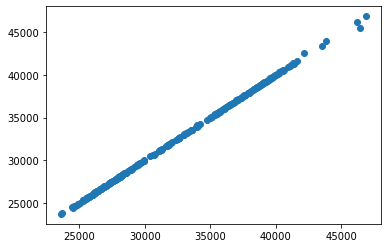

In [66]:
plt.scatter(predictions, y_test)
plt.show()

# reference

1) https://www.kdnuggets.com/2020/01/stock-market-forecasting-time-series-analysis.html

2) https://www.investopedia.com/terms/n/null_hypothesis.asp

3) https://www.kaggle.com/gauravduttakiit/stock-market-prediction-using-numerical-textual#Preparing-the-dataset-for-machine-learning

4) https://www.analyticsvidhya.com/blog/2021/07/stock-prices-analysis-with-python/

5) https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/
